# Explanatory Data Analysis

## Goal: Check for missing values, outliers, categorical, numerical features, typos

## Installing and importing required libraries

In [1]:
#pip install --user pandas_profiling==2.8.0

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [3]:
df = pd.read_csv("Dataset\Telecom_customer churn.csv")

Obtaing the numerical features

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

## Explanatory data analysis

#### The goal of EDA will to check for accuracy, missing values, duplicate rows, structural errors, outliers, imbalance, and correlation 

Run pandas profile report

Using minimal=True as the dataset is very large

In [5]:
#r = ProfileReport(df)
#r.to_file(output_file="Google Drive\EDUCATION\ONLINE\Sharpestminds\Project\Report.html")
ProfileReport(df, minimal=True)

### Calculate the percentage of missing values in each column

In [6]:
missing_per = round((df.isna().sum()/len(df))*100,2)

#Sort the values from largest to smallest and display top 50 rows
pd.DataFrame(missing_per).sort_values(by=0, ascending=False).head(50)

0
numbcars          49.37
dwllsize          38.31
HHstatin          37.92
ownrent           33.71
dwlltype          31.91
lor               30.19
income            25.44
adults            23.02
infobase          22.08
hnd_webcap        10.19
prizm_social_one   7.39
avg6rev            2.84
avg6mou            2.84
avg6qty            2.84
ethnic             1.73
rv                 1.73
marital            1.73
forgntvl           1.73
kid0_2             1.73
kid3_5             1.73
kid6_10            1.73
kid16_17           1.73
creditcd           1.73
truck              1.73
kid11_15           1.73
change_rev         0.89
change_mou         0.89
hnd_price          0.85
mou_Mean           0.36
rev_Mean           0.36
da_Mean            0.36
roam_Mean          0.36
datovr_Mean        0.36
totmrc_Mean        0.36
vceovr_Mean        0.36
ovrrev_Mean        0.36
ovrmou_Mean        0.36
area               0.04
avgqty             0.00
totrev             0.00
adjrev             0.00
adjmou             0.00
adjqty             0.00
avgrev             0.00
avgmou             0.00
totcalls           0.00
avg3mou            0.00
avg3qty            0.00
avg3rev            0.00
eqpdays            0.00

OBSERVATION

Following columns have large amount of missing values.Hence will be deleted
1. numbcars-49.37%
2. dwllsize-38.31%
3. HHstatin-37.92%
4. ownrent -33.71%
5. dwlltype-31.91%
6. lor	   -30.19%
7. income  -25.44%
8. adults  -23.02%
9. infobase-22.08%
10. hnd_webcap-10.19%
11. prizm_social_one-7.39%

Folowing features have low missing rates.Hence, the represtive rows with missing value shall be deleted

1. avg6rev	    2.84%
2. avg6mou	    2.84%
3. avg6qty	    2.84%
4. ethnic	    1.73%
1. rv	        1.73%
6. marital	    1.73%
7. forgntvl     1.73%
8. kid0_2	    1.73%
9. kid3_5	    1.73%
10. kid6_10	    1.73%
12. kid16_17    1.73%
13. creditcd    1.73%
14. truck	    1.73%
15. kid11_15    1.73%
16. change_rev 	0.89%
17. change_mou	0.89%
18. hnd_price	0.85%
19. mou_Mean	0.36%
20. rev_Mean	0.36%
21. da_Mean	    0.36%
22. roam_Mean	0.36%
23. datovr_Mean	0.36%
24. totmrc_Mean	0.36%
25. vceovr_Mean	0.36%
26. ovrrev_Mean	0.36%
27. ovrmou_Mean	0.36%
28. area	    0.04%

## Checking for Outliers

In [7]:
pd.set_option('display.max_columns', None)
df.describe(percentiles=[.05, .25, .50, .75, .95])

rev_Mean      mou_Mean   totmrc_Mean       da_Mean   ovrmou_Mean  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99643.000000   
mean      58.719985    513.559937     46.179136      0.888828     41.072247   
std       46.291677    525.168140     23.623489      2.177619     97.296150   
min       -6.167500      0.000000    -26.915000      0.000000      0.000000   
5%        15.000000     17.000000     10.000000      0.000000      0.000000   
25%       33.260000    150.750000     30.000000      0.000000      0.000000   
50%       48.195000    355.500000     44.990000      0.247500      2.750000   
75%       70.750000    703.000000     59.990000      0.990000     42.000000   
95%      135.968500   1547.475000     84.990000      4.207500    195.250000   
max     3843.262500  12206.750000    409.990000    159.390000   4320.750000   

        ovrrev_Mean   vceovr_Mean   datovr_Mean     roam_Mean    change_mou  \
count  99643.000000  99643.000000  99643.000000  99643.000000  99109.000000   
mean      13.559560     13.295062      0.261318      1.286405    -13.933818   
std       30.500885     30.056089      3.126531     14.711374    276.087509   
min        0.000000      0.000000      0.000000      0.000000  -3875.000000   
5%         0.000000      0.000000      0.000000      0.000000   -388.150000   
25%        0.000000      0.000000      0.000000      0.000000    -87.000000   
50%        1.000000      0.682500      0.000000      0.000000     -6.250000   
75%       14.437500     14.025000      0.000000      0.235000     63.000000   
95%       64.899500     64.348750      0.585000      5.164750    346.000000   
max     1102.400000    896.087500    423.540000   3685.200000  31219.250000   

         change_rev  drop_vce_Mean  drop_dat_Mean  blck_vce_Mean  \
count  99109.000000  100000.000000  100000.000000  100000.000000   
mean      -1.021067       5.955085       0.040520       4.022917   
std       50.363209       8.954715       0.877136      10.672202   
min    -1107.740000       0.000000       0.000000       0.000000   
5%       -48.003500       0.000000       0.000000       0.000000   
25%       -7.365000       0.666667       0.000000       0.000000   
50%       -0.315000       3.000000       0.000000       1.000000   
75%        1.642500       7.666667       0.000000       3.666667   
95%       47.392500      21.666667       0.000000      17.000000   
max     9963.657500     232.666667     207.333333     385.333333   

       blck_dat_Mean  unan_vce_Mean  unan_dat_Mean  plcd_vce_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.025777      27.784905       0.029810     144.881677   
std         1.490255      38.358734       0.496970     158.267711   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.000000       0.000000      38.333333   
50%         0.000000      16.000000       0.000000     100.333333   
75%         0.000000      36.000000       0.000000     198.666667   
95%         0.000000      96.333333       0.000000     441.333333   
max       413.333333     848.666667      81.666667    2289.000000   

       plcd_dat_Mean  recv_vce_Mean  recv_sms_Mean  comp_vce_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.870548      55.085152       0.047590     108.892535   
std         9.053901      86.841198       2.127422     118.580079   
min         0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       5.333333       0.000000      28.666667   
50%         0.000000      26.666667       0.000000      75.666667   
75%         0.000000      71.333333       0.000000     149.666667   
95%         1.666667     200.666667       0.000000     330.666667   
max       733.666667    3369.333333     517.333333    1894.333333   

  

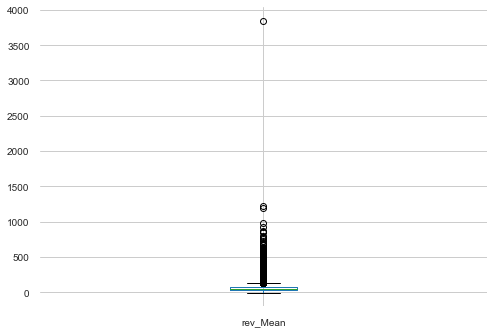

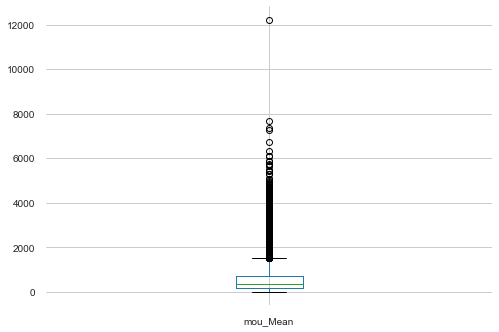

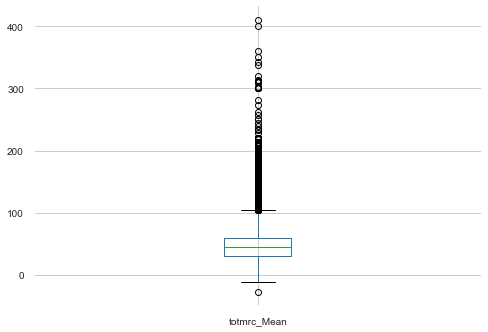

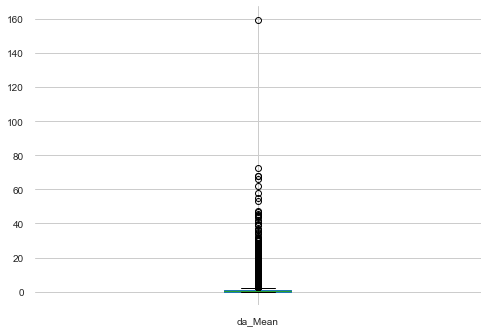

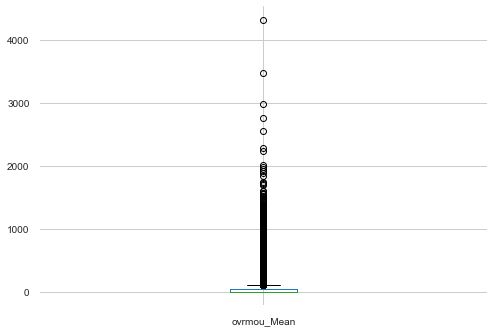

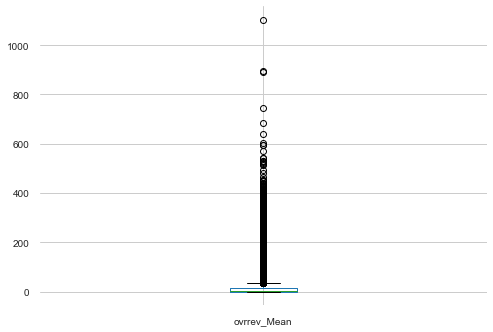

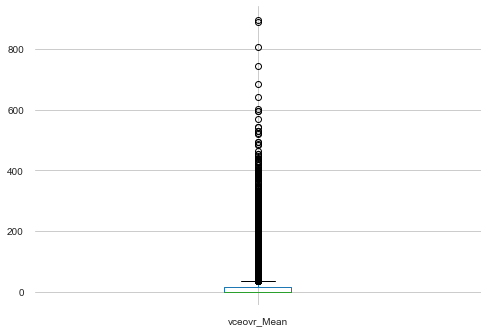

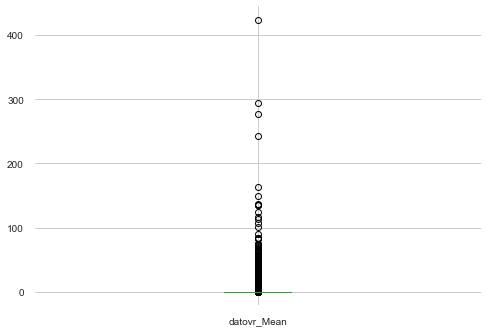

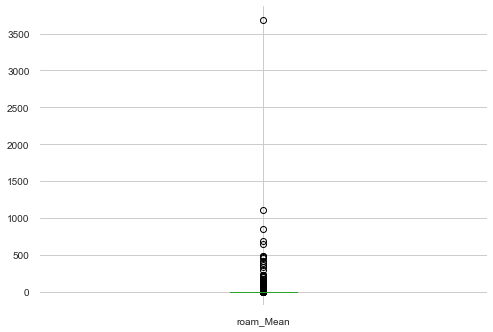

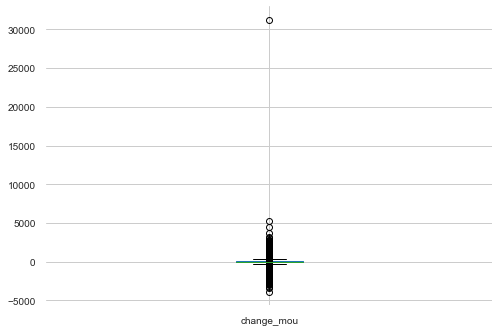

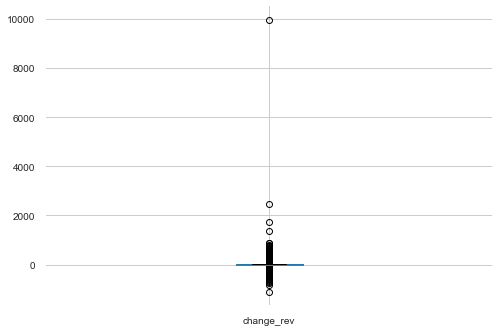

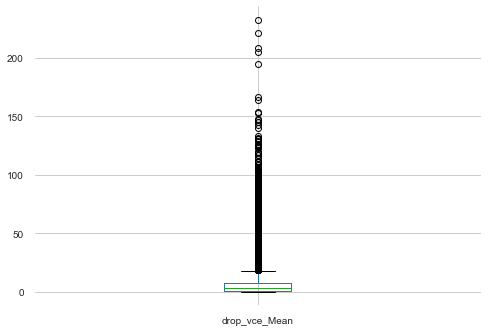

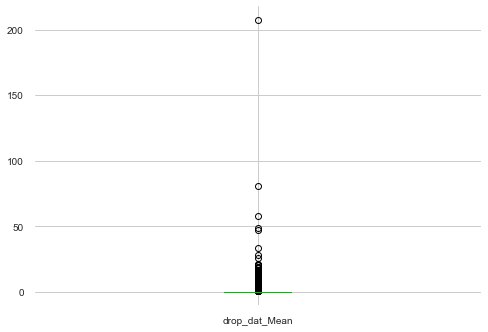

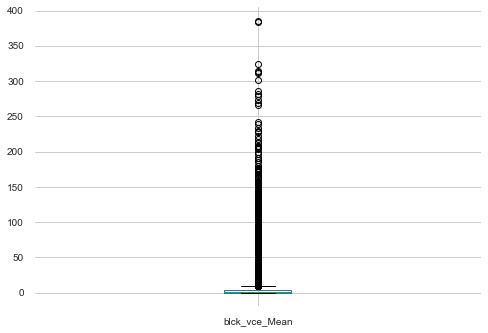

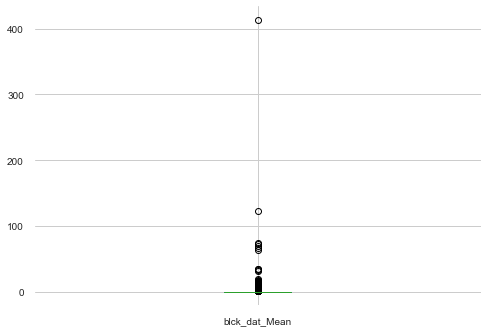

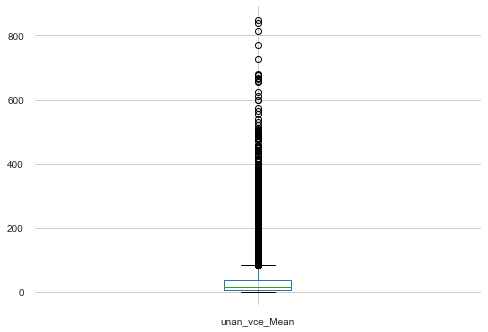

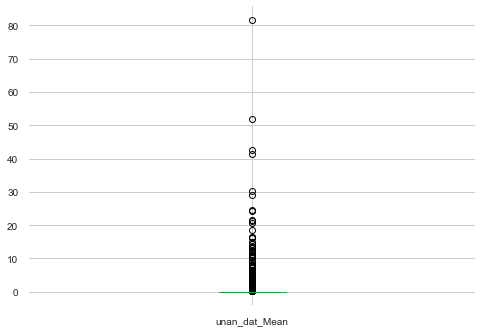

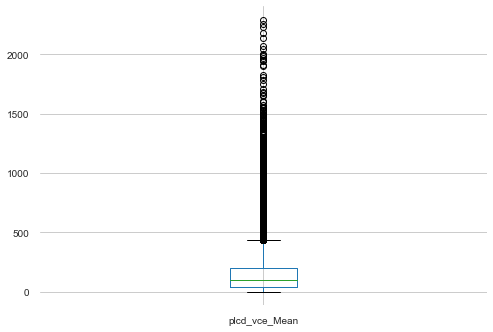

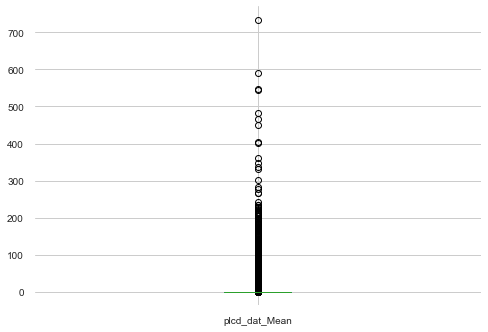

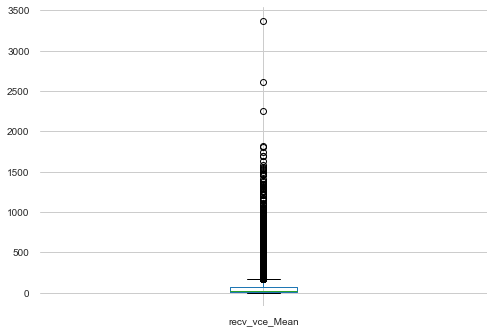

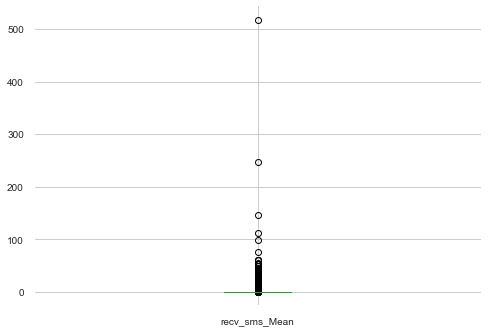

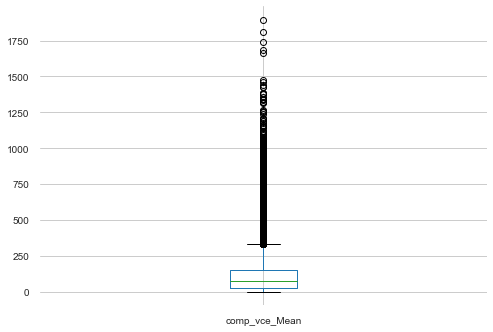

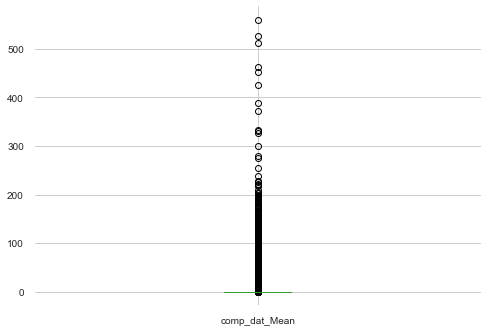

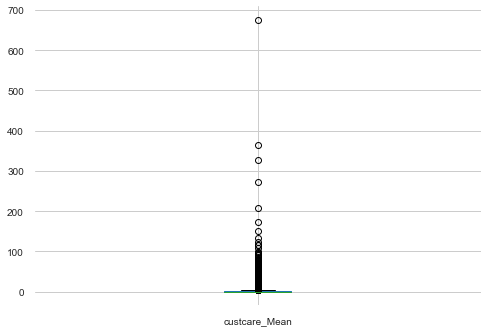

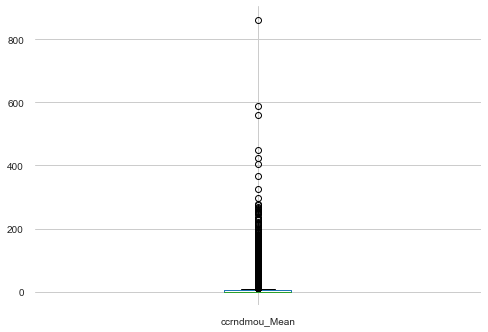

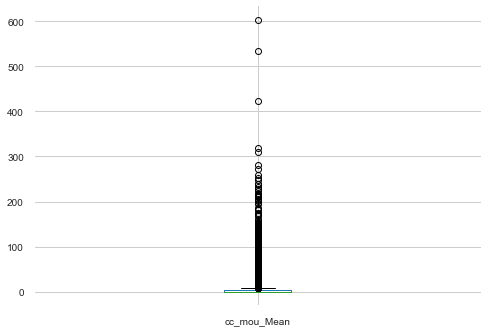

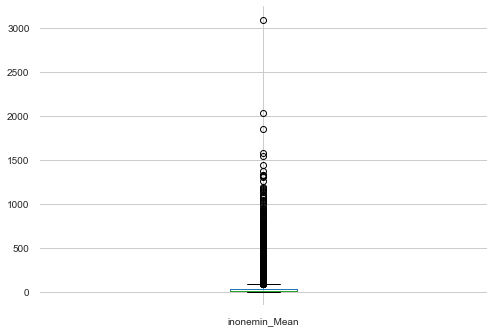

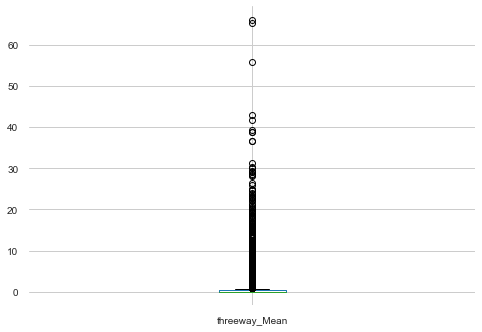

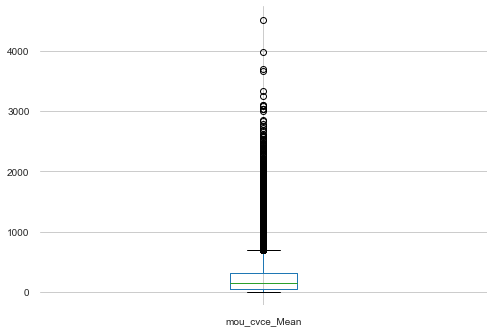

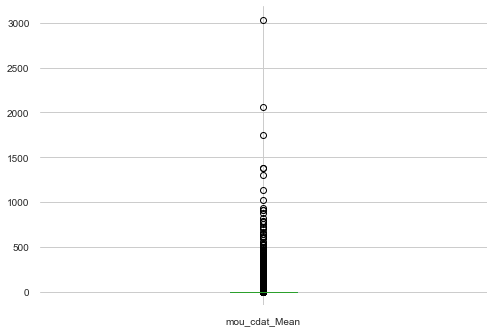

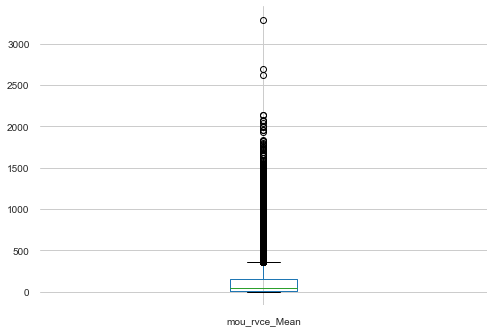

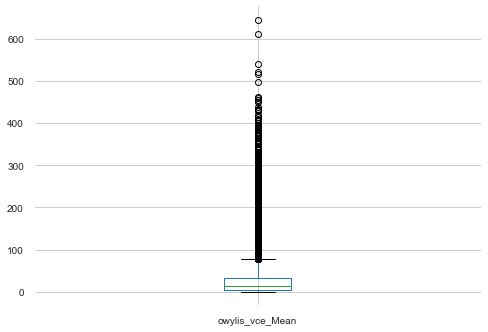

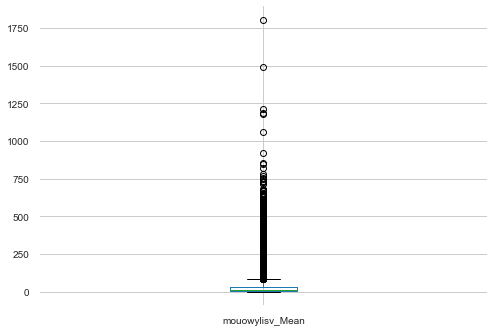

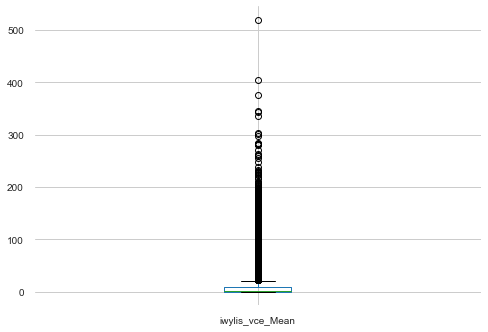

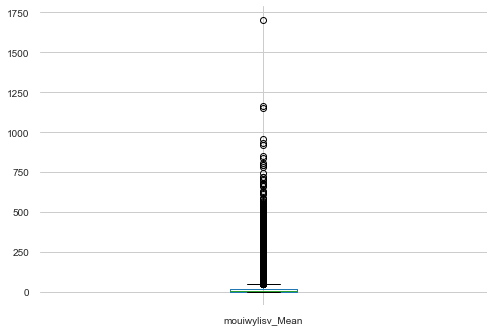

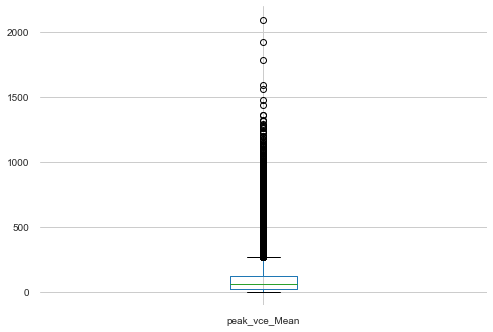

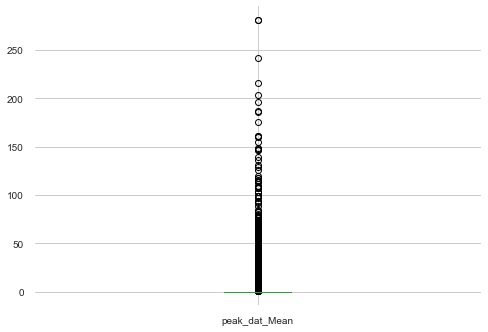

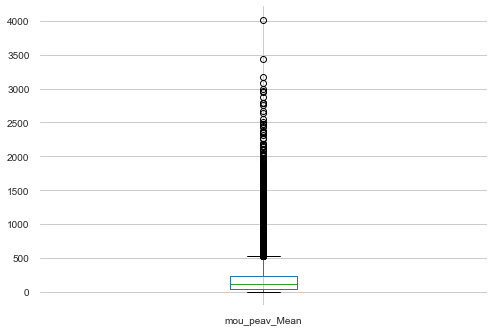

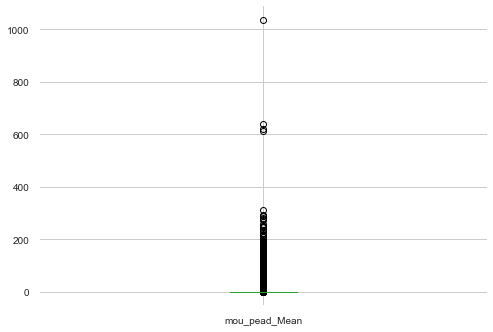

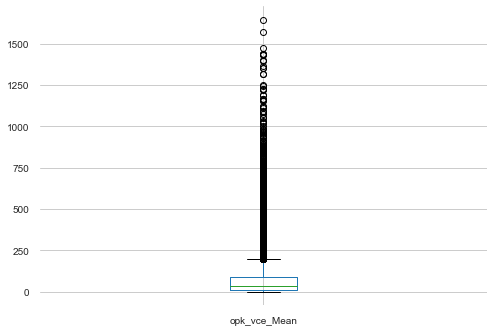

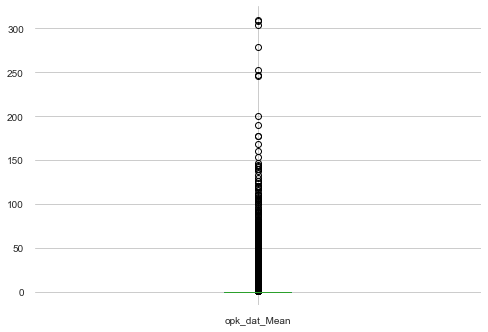

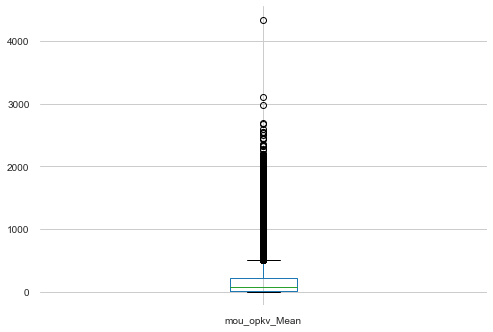

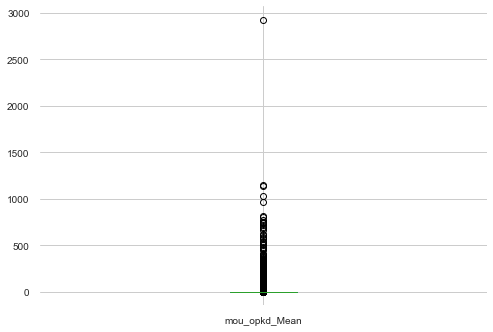

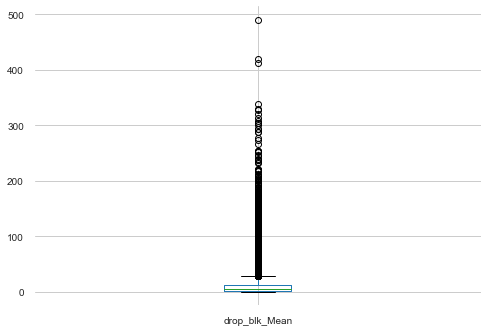

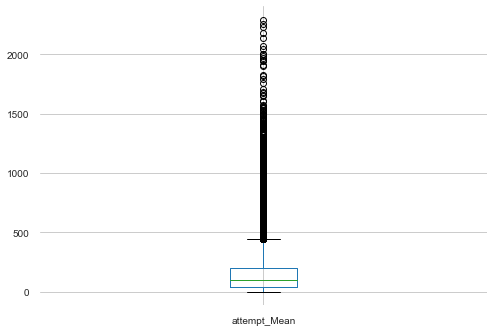

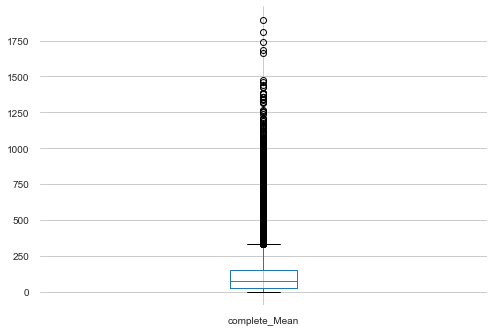

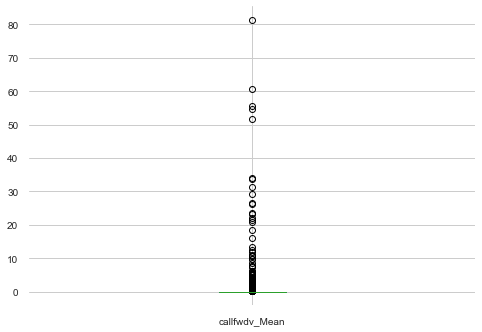

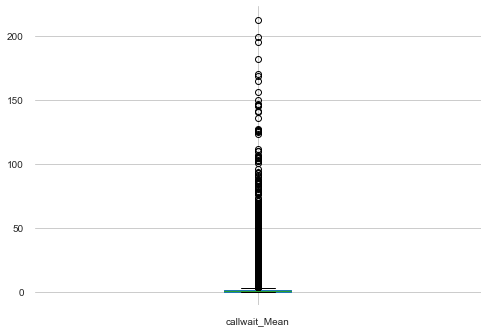

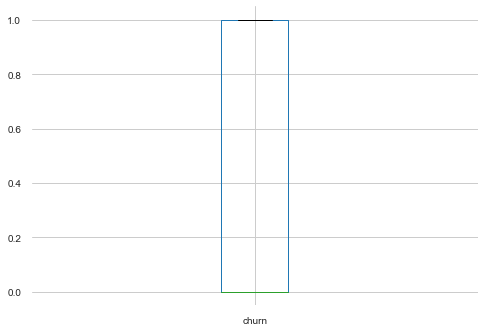

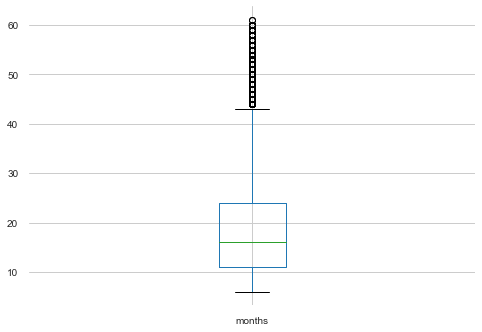

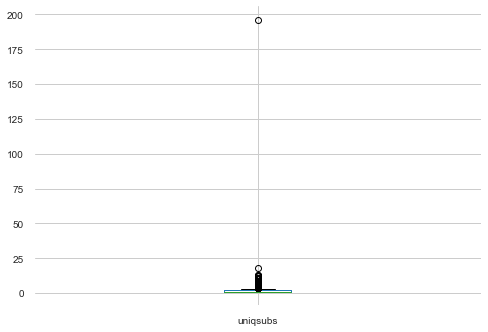

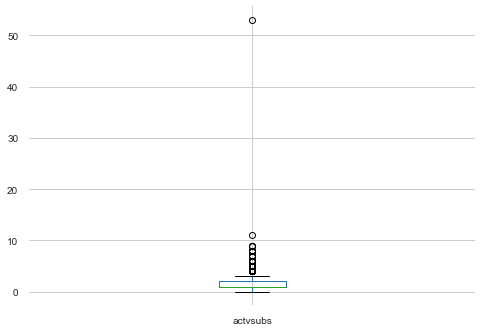

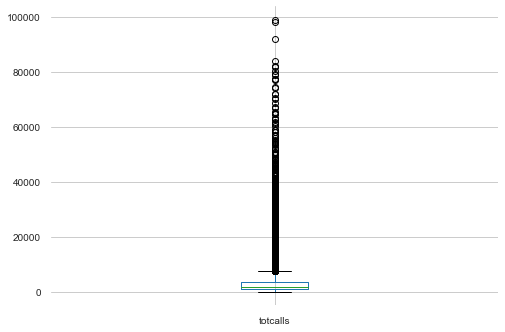

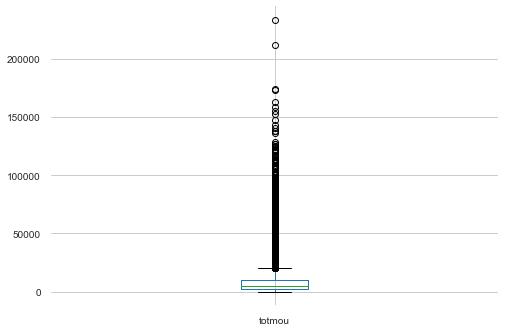

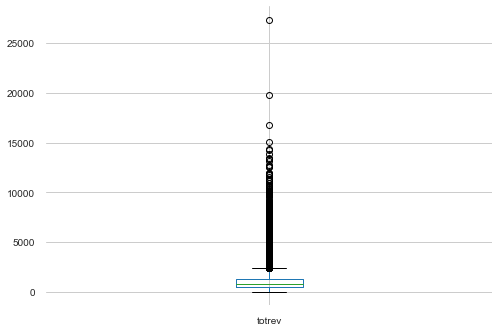

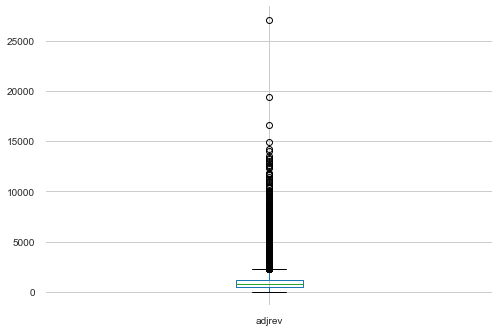

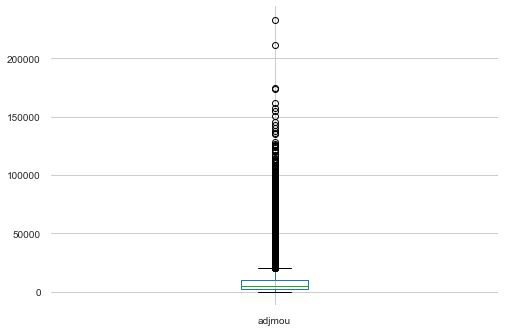

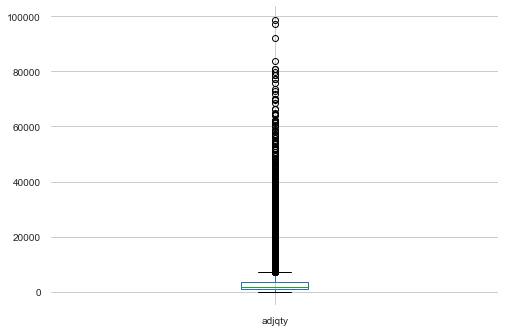

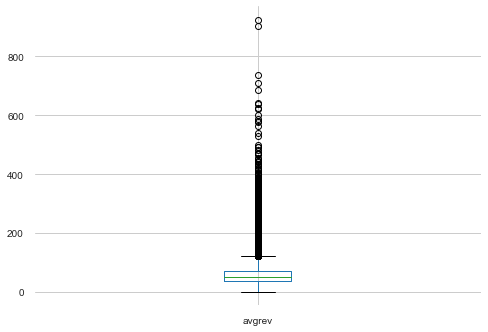

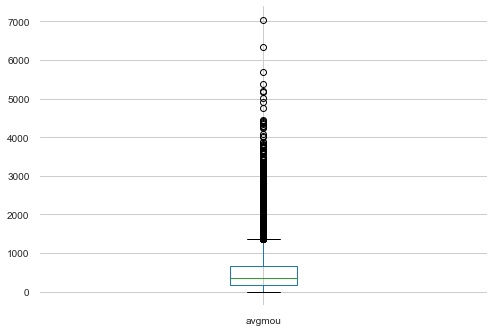

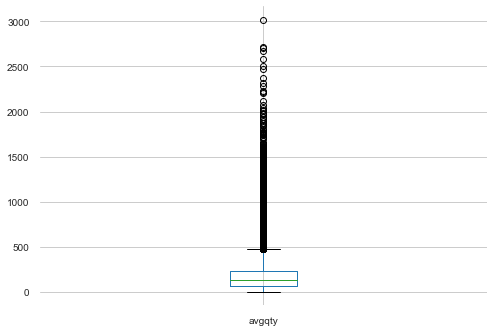

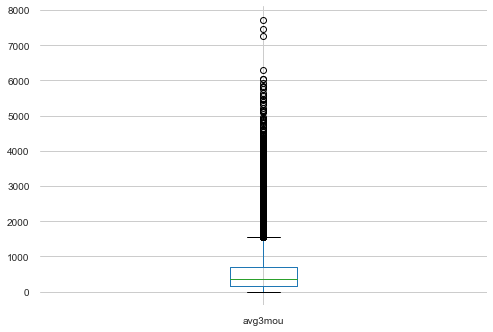

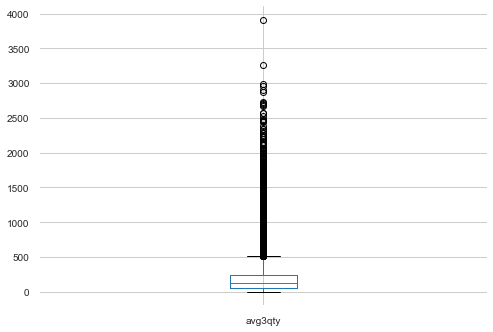

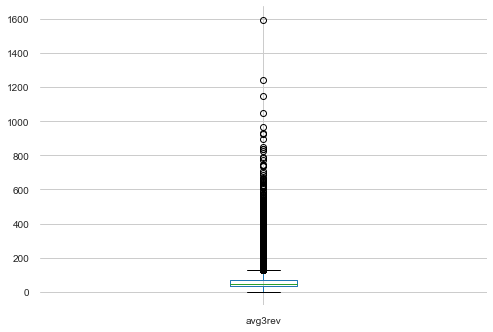

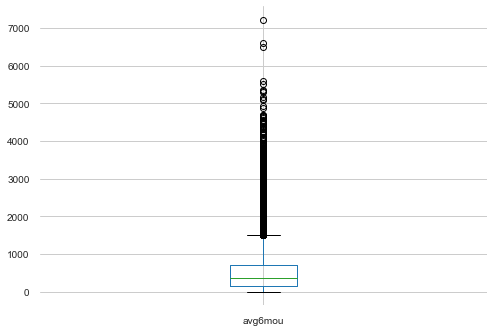

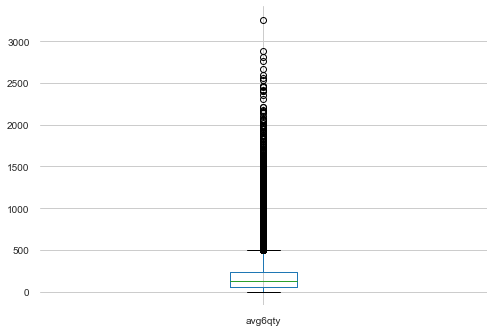

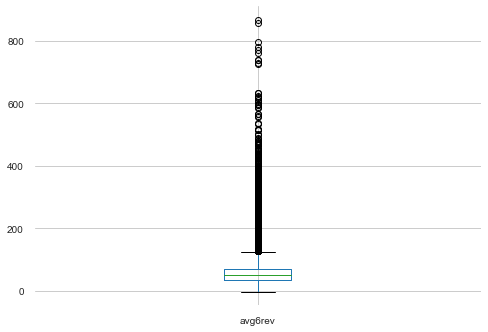

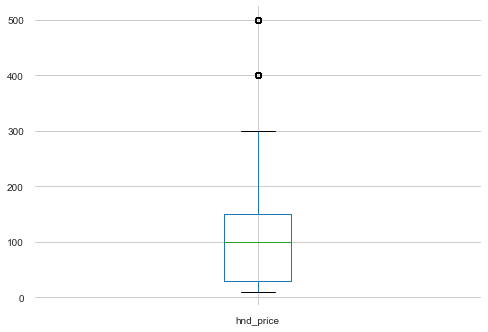

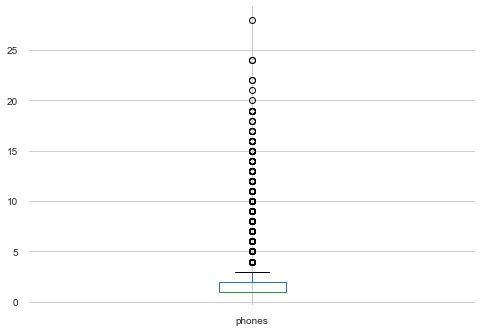

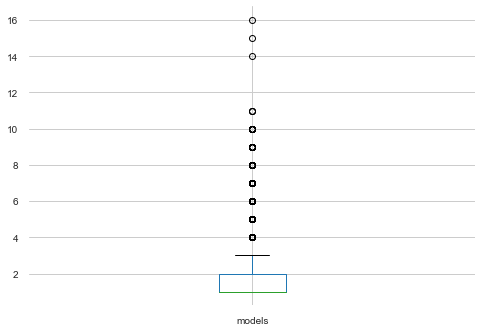

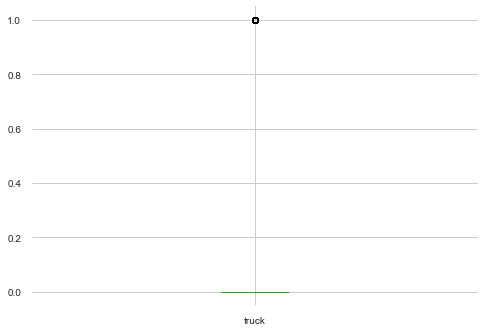

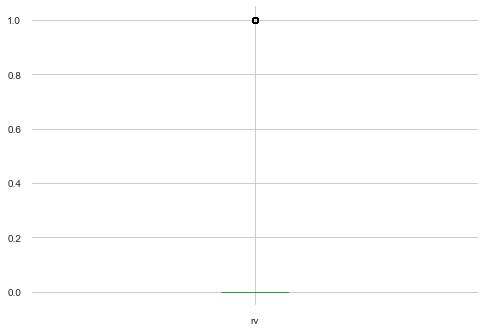

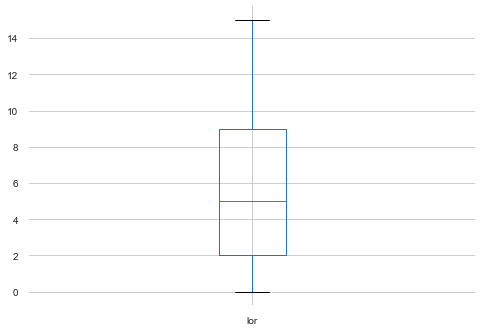

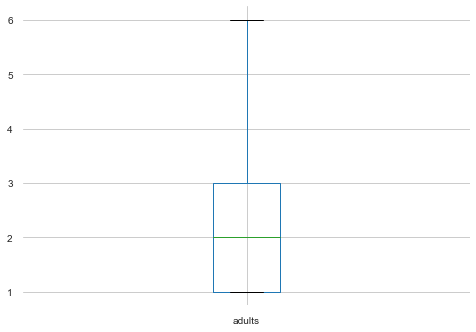

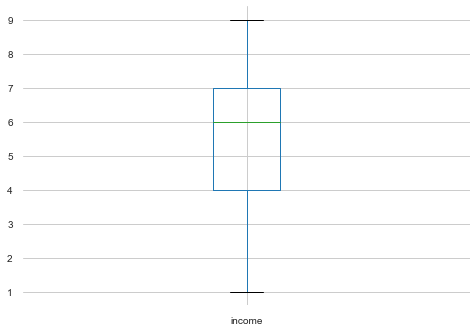

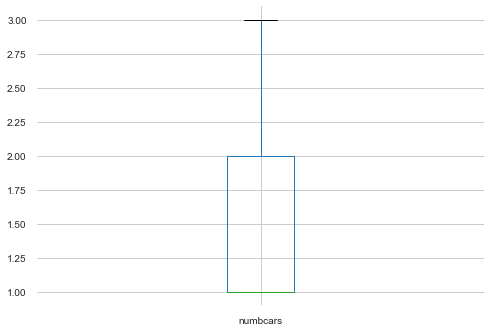

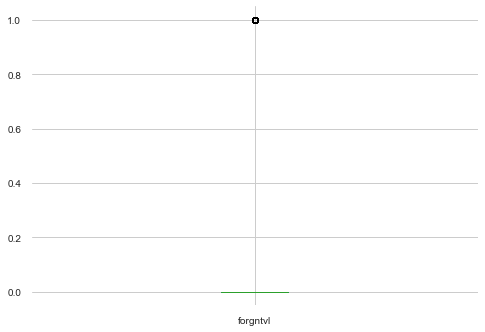

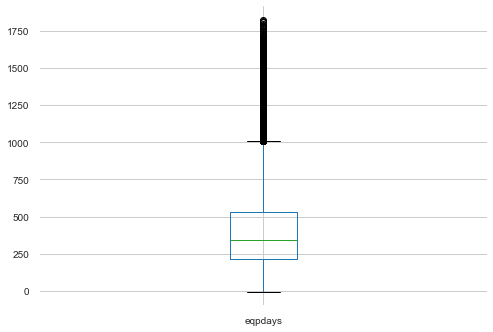

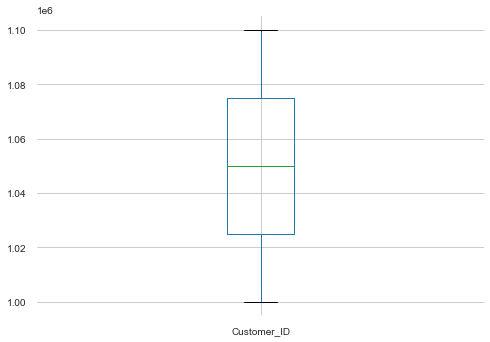

In [8]:
for i, col in enumerate(num_df.columns):
    plt.figure(i)
    df.boxplot(column= [col])

There is huge difference between 95th percentile and maximum value in almost all the numerical features

This suggests that there are large outliers.
Since, the numerical features are closely correlated with each other, suggest that removing the outlier rows would remove outliers from other features too.

KeyError: 'new_cell'

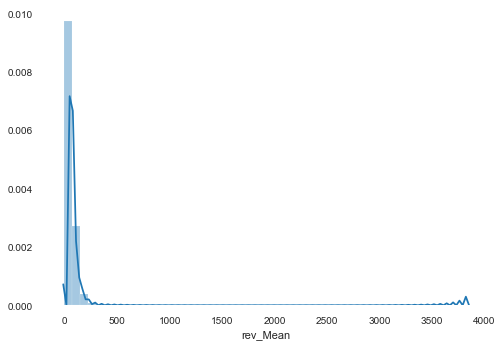

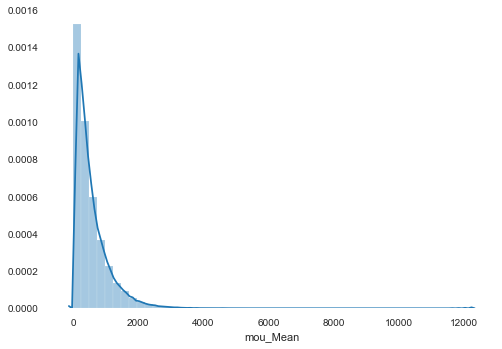

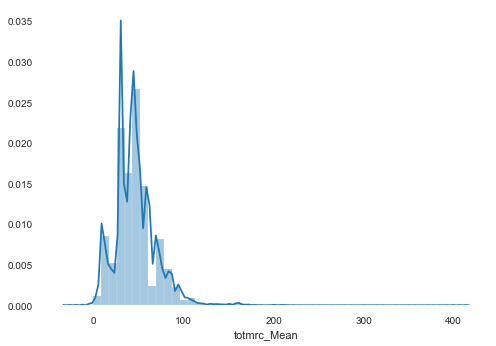

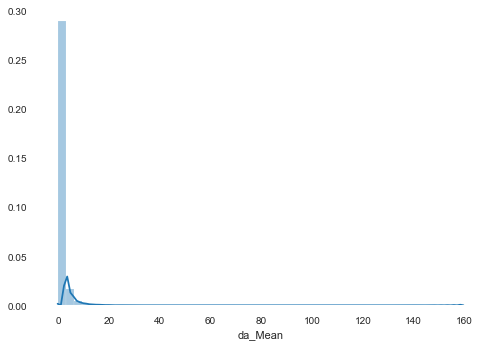

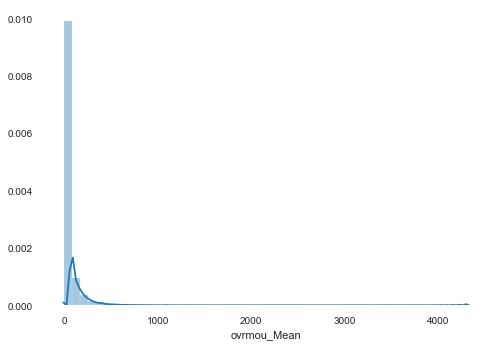

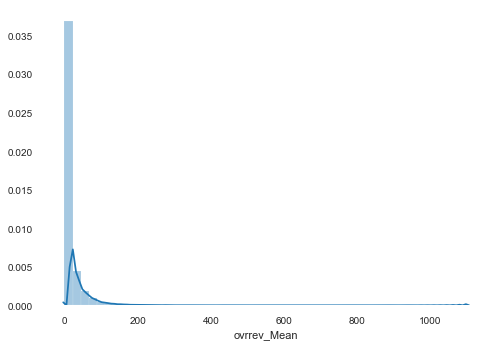

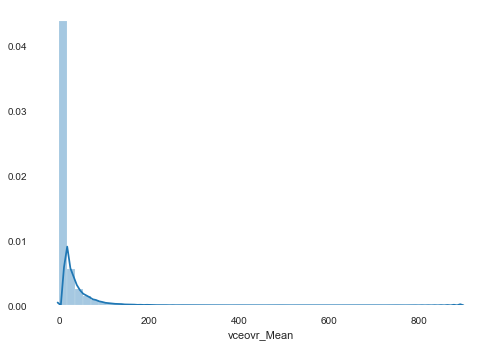

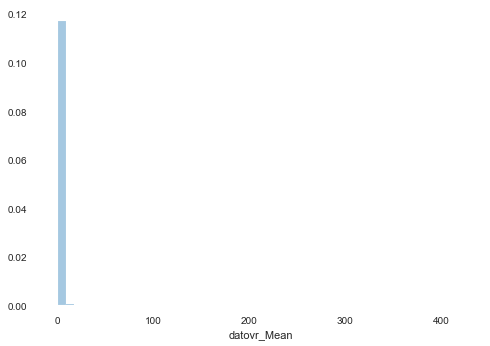

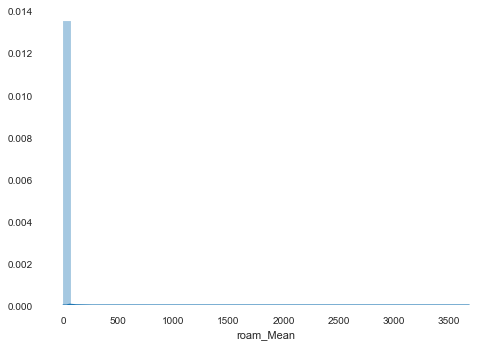

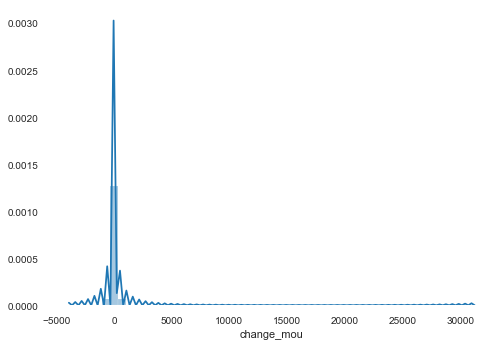

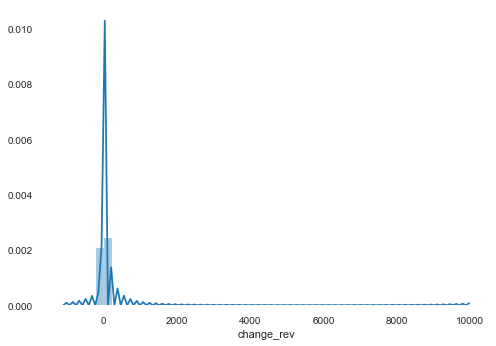

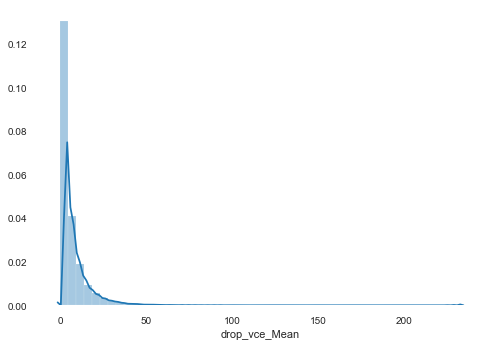

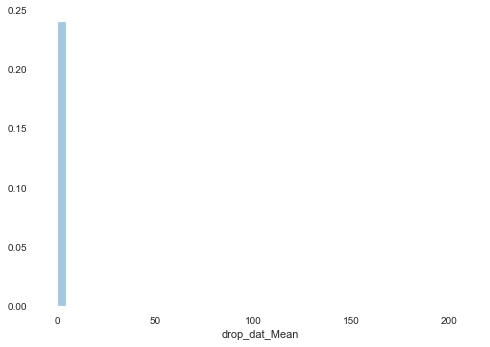

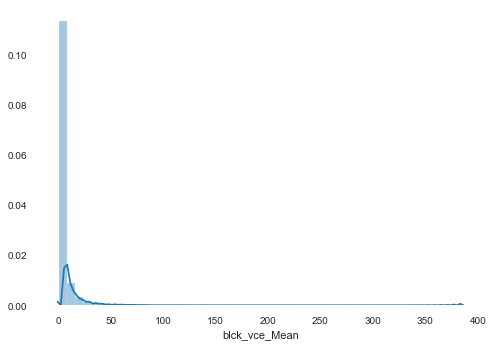

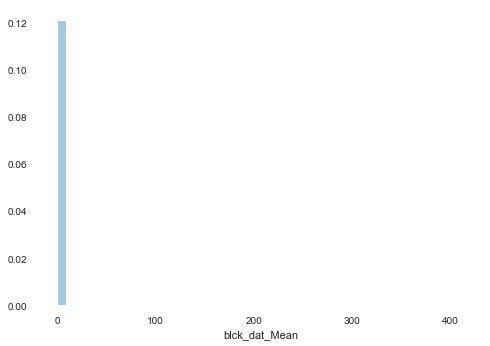

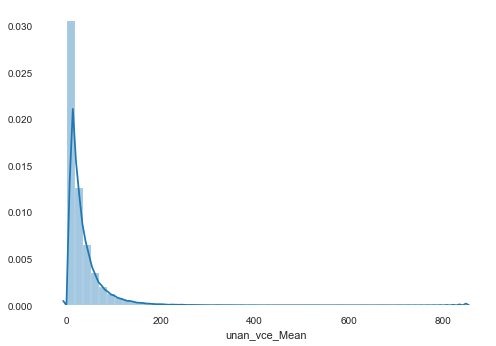

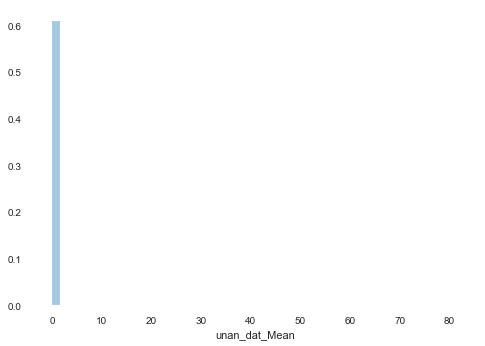

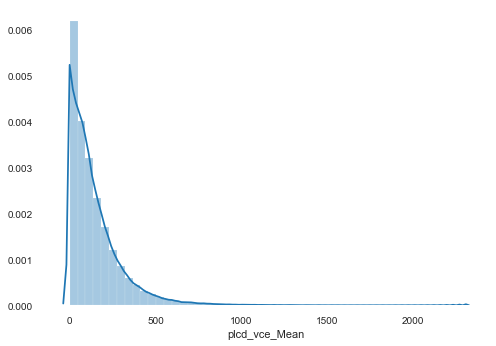

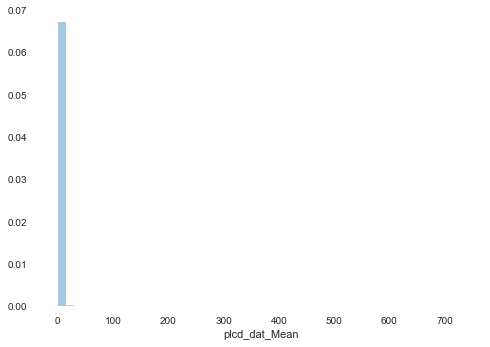

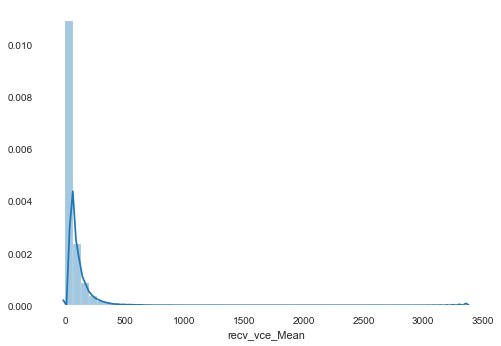

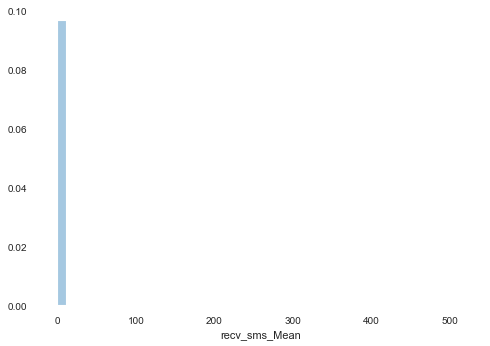

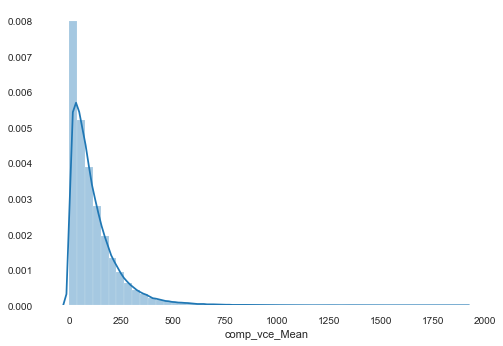

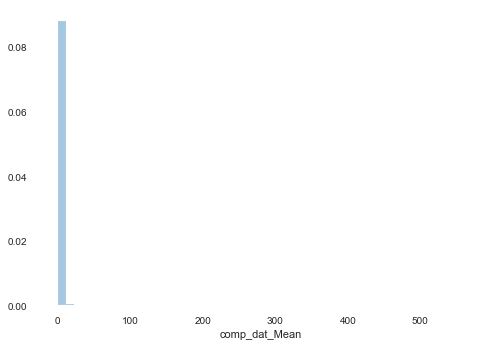

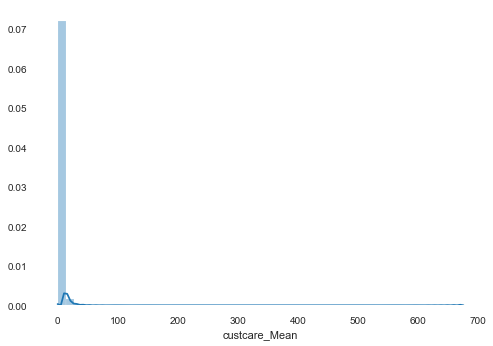

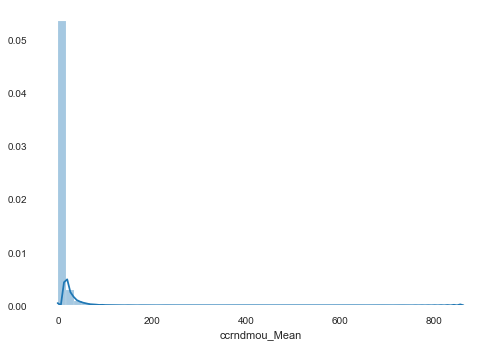

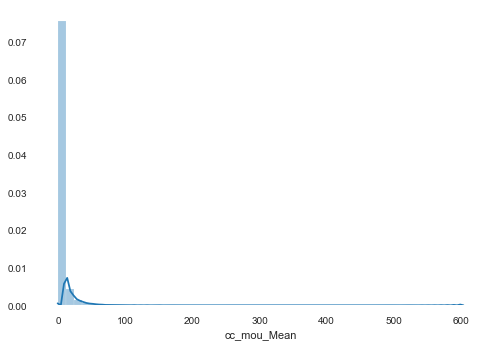

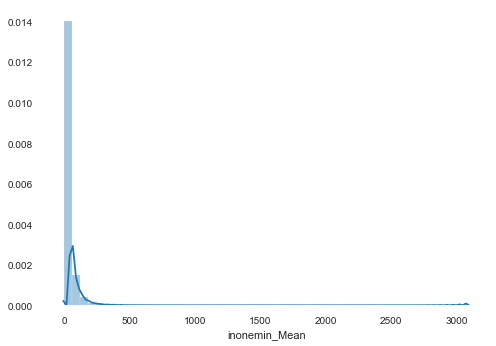

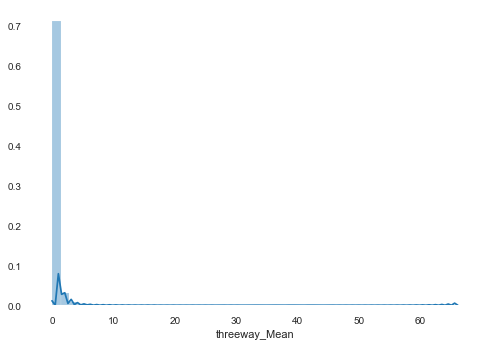

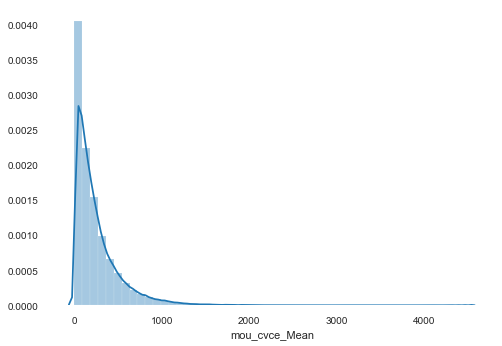

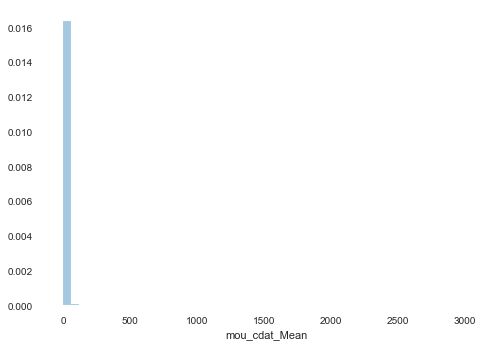

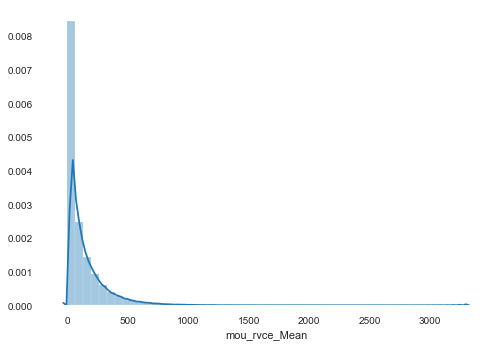

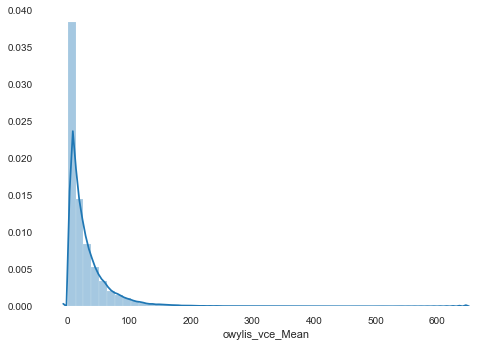

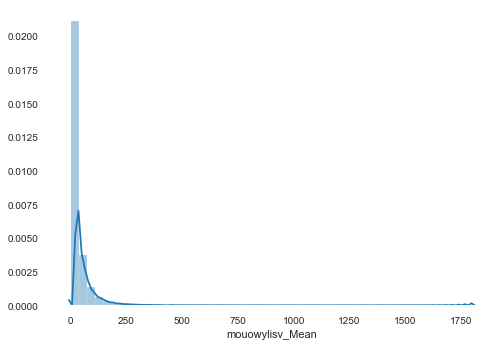

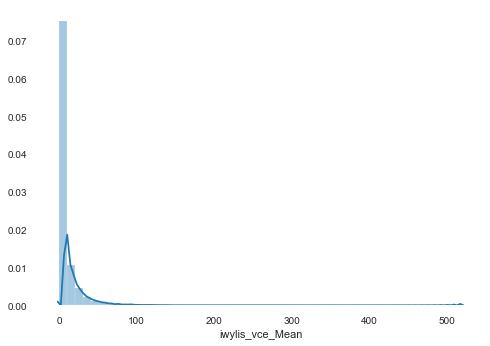

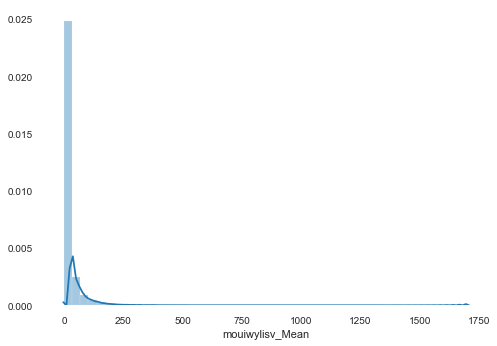

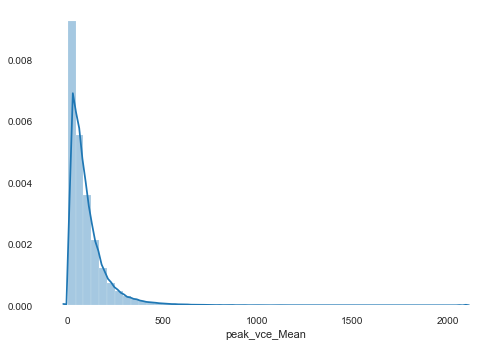

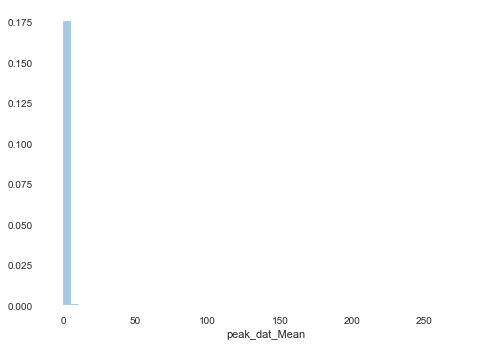

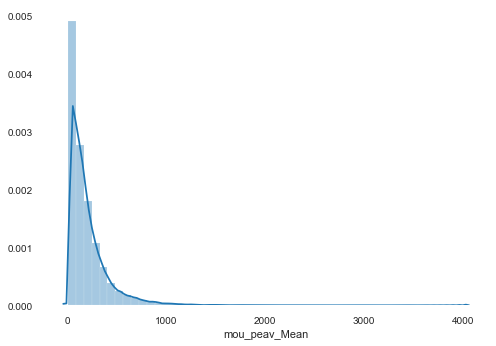

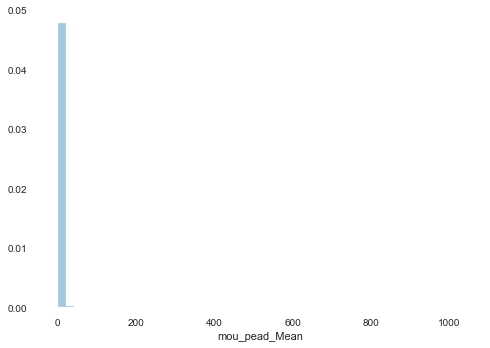

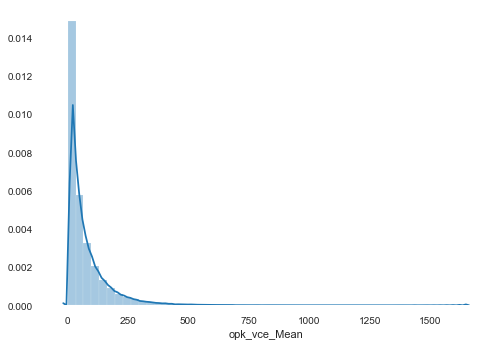

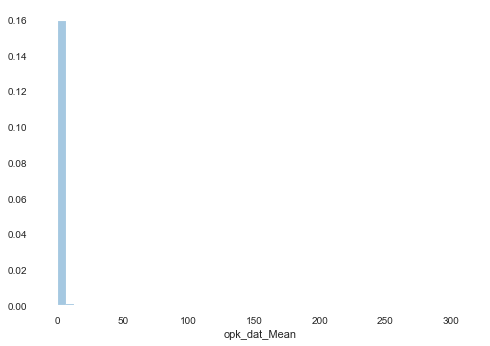

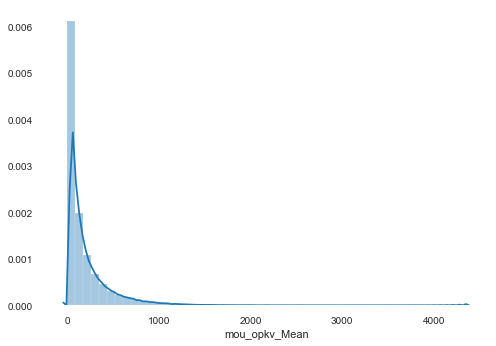

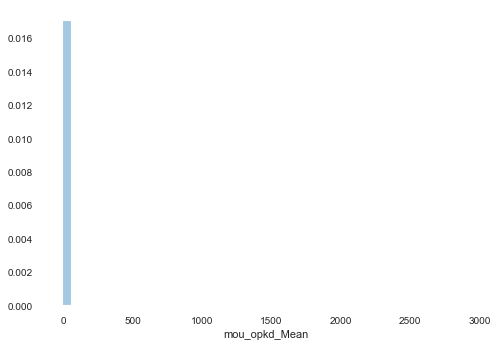

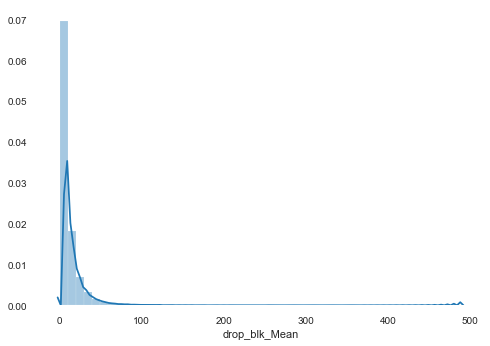

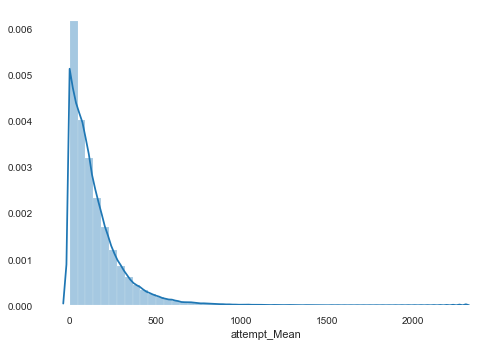

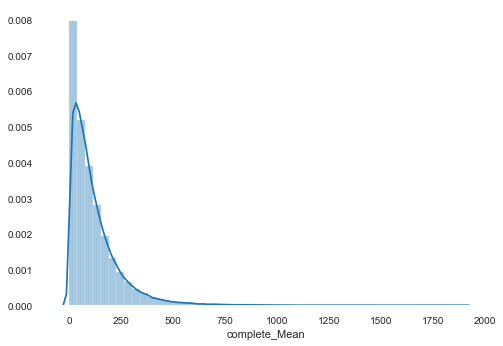

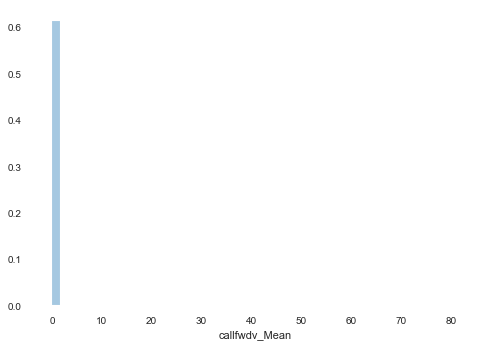

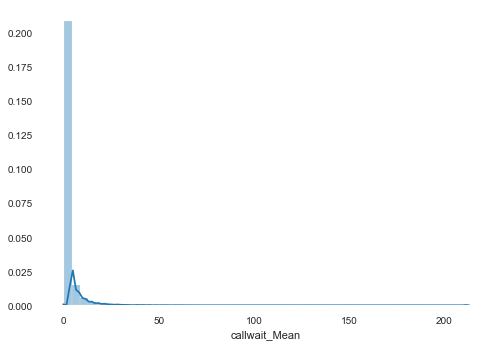

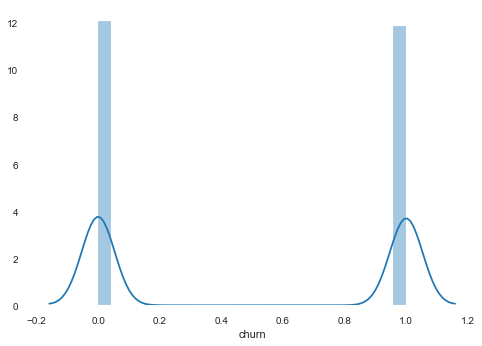

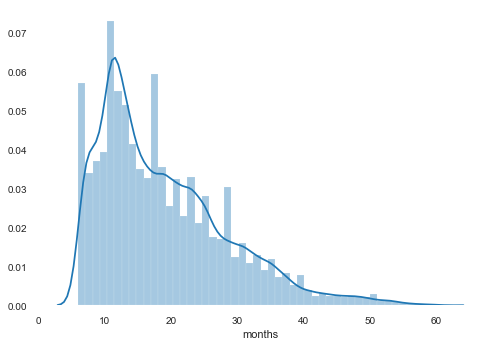

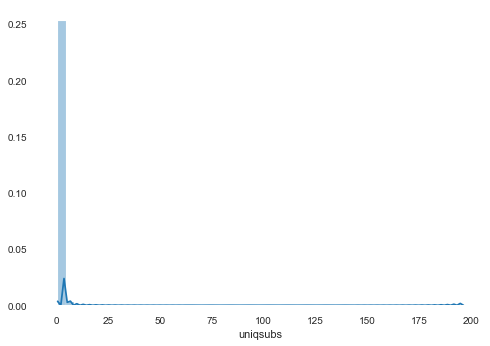

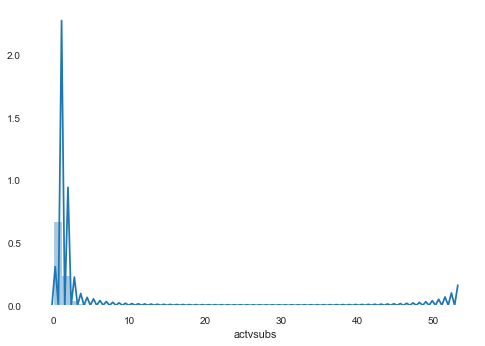

<Figure size 576x396 with 0 Axes>

In [9]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(num_df[col])

In [10]:
cat_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
for col in cat_df.columns:
    print(col)
    print("unique Values :" ,cat_df[col].unique()) # to print categories name only
    print("Value counts of unique values :\n",cat_df[col].value_counts()) # to print count of every category
    print("-----------------------------------------------------------------------------------------")

new_cell
unique Values : ['U' 'N' 'Y']
Value counts of unique values :
 U    66914
Y    19301
N    13785
Name: new_cell, dtype: int64
-----------------------------------------------------------------------------------------
crclscod
unique Values : ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
Value counts of unique values :
 AA    36509
A     16996
BA    12667
CA     8334
EA     6419
B      4110
DA     3669
ZA     3493
C      1456
A2      861
E4      833
U       480
E       339
D4      301
GA      281
Z4      253
D       247
I       243
G       241
JF      194
Z       191
CY      190
J       190
C2      180
M       169
ZY      119
D5      114
B2      109
K       106
W        97
C5       81
V1       70
U1       66
EM       57
Z5       56
Y        54
EC       48
GY       34
O     

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

### Summary

1. Since 50% customer stayed and other 50% churned its a balanced dataset
2. Columns with more than 3% missing rate can be deleted
3. Features with less than 3% missing values will have their missing rows be deleted
4. Outliers to be removed for all numerical features
5. Customer ID is the primary key can thus will be made Index
6. In numcars NaN means 0 cars
7. Categorical values do not have typos